                                     PROCESAMIENTO DE IMAGENES CON PYTHON
                                            ELKIN RAMIREZ GONZALEZ

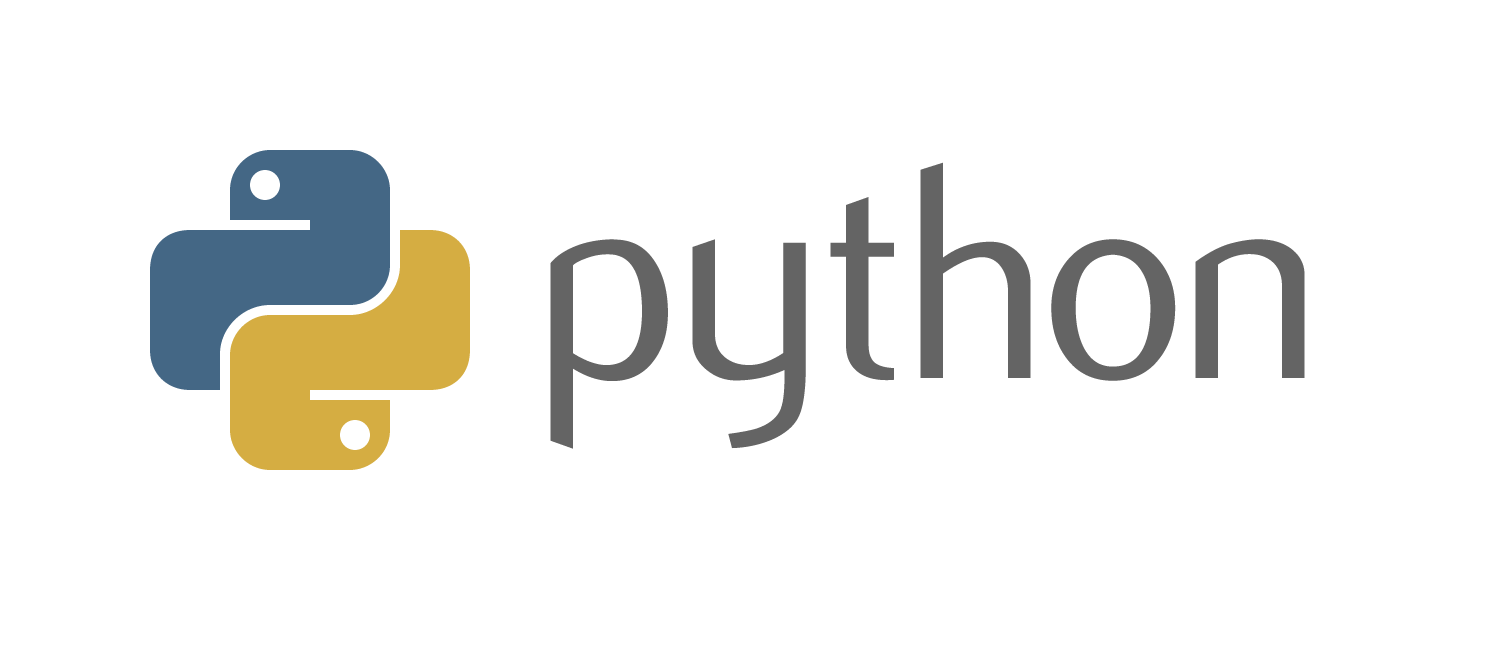

Librerias a utilizar

In [2]:
import scipy.misc
import statistics
import numpy as np # algebra lineal y componente matematica (matrices, arrreglos)
import scipy # matematica
import pandas as pd #manejo de datos
from matplotlib import pyplot as plt #graficas
import cv2
from IPython.display import Image
from PIL import Image

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


**IMAGEN CON LA QUE SE VA TRABAJAR**



- Dimensiones de la imagen:
(300, 300, 3)
- Tamaño de la imagen  en pixeles:
270000
- Media:
99.02647777777777
- Varianza:
7496.928332260617
- Mediana:
77.0
- Desviacion tipica:
86.58480428031594


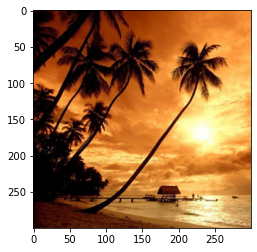

In [8]:
img  =  cv2.imread( "IMAGEN2.png" )
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)

print("- Media:")
print(RGB_im.mean())

print("- Varianza:")
print(np.var(RGB_im))

print("- Mediana:")
print(np.median(RGB_im))

print("- Desviacion tipica:")
print(np.std(RGB_im))



plt . imshow ( RGB_im )

plt . show ()

**Convertir la imagen a escala de grises (Blanco y Negro)**

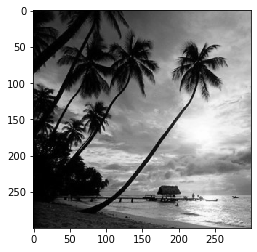

In [40]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
RGB_im = cv2.cvtColor (gray_img, cv2.COLOR_BGR2RGB)


plt . imshow ( RGB_im )

plt . show ()


**RGB**

Una imagen es un conjunto de pixeles distribuidos en forma de cuadrícula. Cada pixel a su vez está conformado por otros componentes, que combinados forman los colores que podemos ver en una imagen.

**Nota:** El orden en el que OpenCV usa estos componentes es en BGR, no RGB.

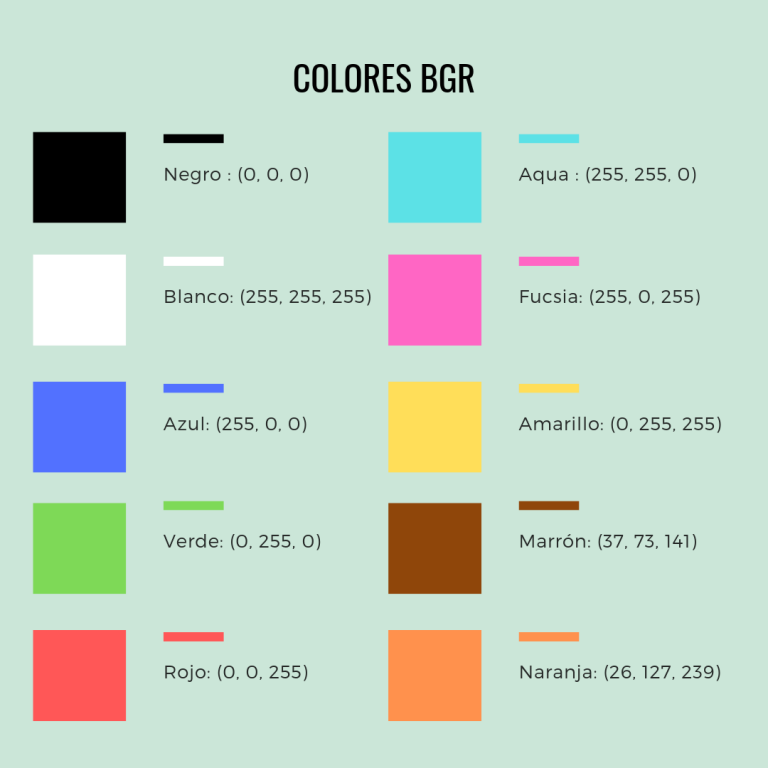

Para saber mas colores ingrese al [link](https://htmlcolorcodes.com/es/)

**CONSTRUYENDO UNA IMAGEN CON NUMPY**

- Dimensiones de la imagen:
(400, 300, 3)
- Tamaño de la imagen  en pixeles:
360000
- Media:
170.0
- Varianza:
14450.0
- Desviacion tipica:
120.20815280171308


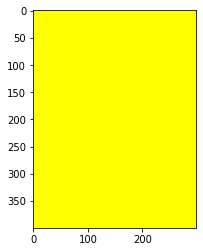

In [63]:
import numpy as np 
rgb = np.zeros((400, 300, 3), dtype=np.uint8) 
rgb[:,:,:] = (0, 255, 255)

RGB_im = cv2.cvtColor (rgb, cv2.COLOR_BGR2RGB)

print("- Dimensiones de la imagen:")
print(rgb.shape)

print("- Tamaño de la imagen  en pixeles:")
print(rgb.size)

print("- Media:")
print(rgb.mean())

print("- Varianza:")
print(np.var(rgb))


print("- Desviacion tipica:")
print(np.std(rgb))

plt . imshow (RGB_im )

plt . show ()

**HISTOGARAMA IMAGEN GRIS**

El histograma nos ayuda a ver el comportamiento de la imagen, el nivel de intensidad está en el rango de 0 a 255, en donde el valor 0 representa los color negro y 255 el color blanco

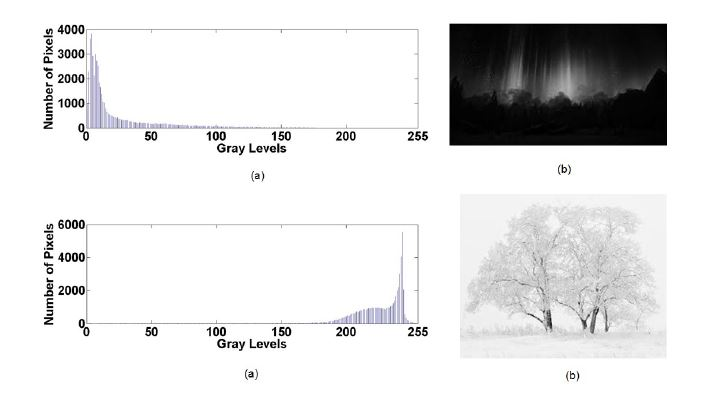

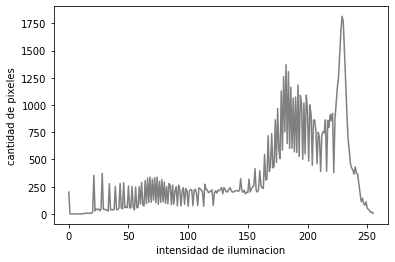

In [42]:
img = cv2.imread('IMAGEN222.png', cv2.IMREAD_GRAYSCALE)


hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )



plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

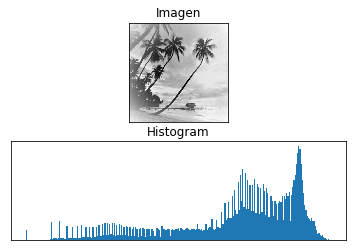

In [20]:
img = cv2.imread('IMAGEN222.png',0)
plt.subplot(2,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2), plt.hist(img.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
 
plt.show()

**HISTOGRAMA DE IMAGEN A COLOR**

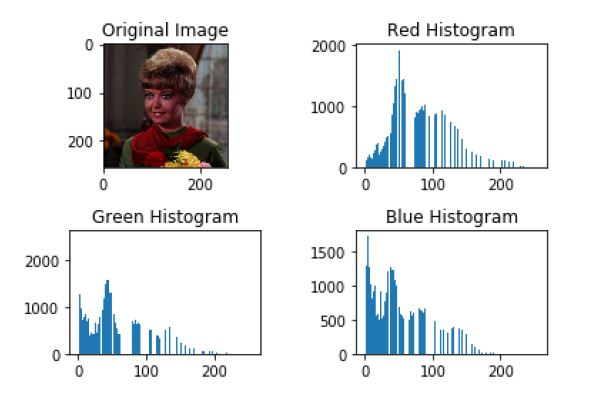

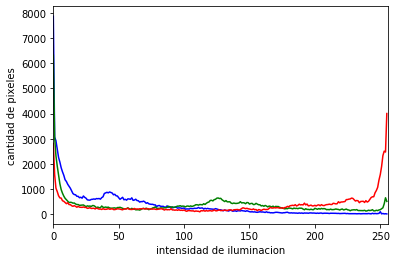

In [10]:
img = cv2.imread('IMAGEN2.png')
cv2.imshow('IMAGEN2.png', img)

color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])


plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

**MASCARA**

Hasta ahora hemos utilizado cv2.calcHist() para encontrar el histograma de la imagen completa. ¿Qué sucede si quisiéramos encontrar histogramas de algunas regiones de una imagen? Para esto, simplemente, debemos crear una imagen de máscara con un color blanco en la región en la que desea buscar el histograma y, el resto de la imagen en negro. 

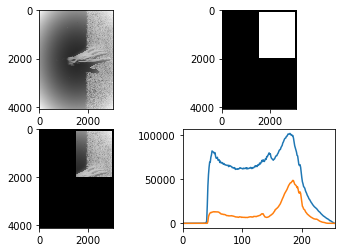

In [17]:
img = cv2.imread("rr.png")
imgg = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )
# crear máscara
mask = np.zeros(imgg.shape[:2], np.uint8)
mask[100:2000, 1500:3000] = 255
masked_img = cv2.bitwise_and(imgg,imgg,mask = mask)

# Calcular el histohrama con máscara y sin máscara
hist_full = cv2.calcHist([imgg],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([imgg],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(imgg, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

**UMBRALIZACION**

La umbralización es el método más simple de la segmentación de imágenes cuyo objetivo es separar un objeto de interés del fondo de una imagen. Hay que tomar en cuenta que para su aplicación deben emplearse imágenes en las que el objeto y el fondo sean diferenciables, ya que si no lo son, va a ser mucho más difícil determinar dicho objeto.

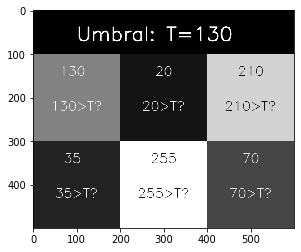

In [105]:
grises = np.zeros((500,600),dtype=np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(grises,'Umbral: T=130',(100,70), font, 1.5,(255),2,cv2.LINE_AA)
grises[100:300,:200] = 130
grises[100:300,200:400] = 20
grises[100:300,400:600] = 210
grises[300:600,:200] = 35
grises[300:600,200:400] = 255
grises[300:600,400:600] = 70
cv2.putText(grises,'130',(60,150), font, 1, (255), 1, cv2.LINE_AA)
cv2.putText(grises,'20',(280,150), font, 1,(255), 1, cv2.LINE_AA)
cv2.putText(grises,'210',(470,150), font, 1,(0), 1, cv2.LINE_AA)
cv2.putText(grises,'35',(70,350), font, 1, (255), 1, cv2.LINE_AA)
cv2.putText(grises,'255',(270,350), font, 1, (0), 1, cv2.LINE_AA)
cv2.putText(grises,'70',(480,350), font, 1, (255), 1, cv2.LINE_AA)
cv2.putText(grises,'130>T?',(40,230), font, 1, (255), 1, cv2.LINE_AA)
cv2.putText(grises,'20>T?',(250,230), font, 1, (255), 1, cv2.LINE_AA)
cv2.putText(grises,'210>T?',(440,230), font, 1, (0), 1, cv2.LINE_AA)
cv2.putText(grises,'35>T?',(50,430), font, 1, (255), 1, cv2.LINE_AA)
cv2.putText(grises,'255>T?',(240,430), font, 1, (0), 1, cv2.LINE_AA)
cv2.putText(grises,'70>T?',(450,430), font, 1, (255), 1, cv2.LINE_AA)
RGB_im = cv2.cvtColor (grises, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )



plt . show ()

# mejor visualizacion
#cv2.imshow('gris',grises)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

En la imagen se puede apreciar como título “Umbral: T=130”, seguido de 6 secciones cada una de ellas con su valor en escala de grises, seguido de una comparación entre dicho valor y 130. Esto servirá muchísimo para realizar el proceso de umbralizacion.

Apliquemos entonces la umbralizacion simple a la imagen anteriormente realizada:

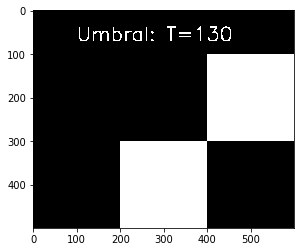

In [103]:
grises = np.zeros((500,600),dtype=np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(grises,'Umbral: T=130',(100,70), font, 1.5,(255),2,cv2.LINE_AA)
grises[100:300,:200]=130
grises[100:300,200:400]=20
grises[100:300,400:600]=210
grises[300:600,:200]=35
grises[300:600,200:400]=255
grises[300:600,400:600]=70
grises2 = grises.copy()
cv2.putText(grises,'130',(60,150), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'20',(280,150), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'210',(470,150), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'35',(70,350), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'255',(270,350), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'70',(480,350), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'130>T?',(40,230), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'20>T?',(250,230), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'210>T?',(440,230), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'35>T?',(50,430), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'255>T?',(240,430), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'70>T?',(450,430), font, 1,(255),1,cv2.LINE_AA)
_, binarizada = cv2.threshold(grises2,130,255,cv2.THRESH_BINARY)

RGB_im = cv2.cvtColor (binarizada, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )

plt . show ()


# visualizacion amplia
#cv2.imshow('Grises',grises)
#cv2.imshow('Binarizada',binarizada)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

**Apliquemos a esta misma imagen, umbralizacion inversa**

Ahora en vez de cv2.THRESH_BINARY, apliquemos cv2.THRESH_BINARY_INV. Cuando se cumple que el valor del pixel es mayor a la del umbral toma el valor de 0 o negro, mientras que cuando no se cumple se asigna 255, para este ejemplo.

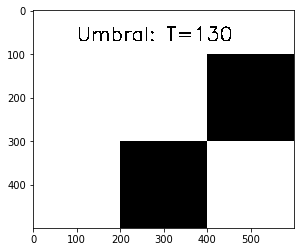

In [106]:
grises = np.zeros((500,600),dtype=np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(grises,'Umbral: T=130',(100,70), font, 1.5,(255),2,cv2.LINE_AA)
grises[100:300,:200]=130
grises[100:300,200:400]=20
grises[100:300,400:600]=210
grises[300:600,:200]=35
grises[300:600,200:400]=255
grises[300:600,400:600]=70
grises2 = grises.copy()
cv2.putText(grises,'130',(60,150), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'20',(280,150), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'210',(470,150), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'35',(70,350), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'255',(270,350), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'70',(480,350), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'130>T?',(40,230), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'20>T?',(250,230), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'210>T?',(440,230), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'35>T?',(50,430), font, 1,(255),1,cv2.LINE_AA)
cv2.putText(grises,'255>T?',(240,430), font, 1,(0),1,cv2.LINE_AA)
cv2.putText(grises,'70>T?',(450,430), font, 1,(255),1,cv2.LINE_AA)
_, binarizada = cv2.threshold(grises2,130,255,cv2.THRESH_BINARY_INV)

RGB_im = cv2.cvtColor (binarizada, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )

plt . show ()


# visualizacion amplia
#cv2.imshow('Grises',grises)
#cv2.imshow('Binarizada',binarizada)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

**EJEMPLO:**

* **UMBRALIZACION SIMPLE**

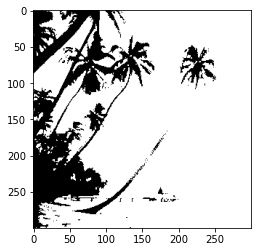

In [3]:
image = cv2.imread('IMAGEN22.png', 0)

_, binarizada = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY)



RGB_im = cv2.cvtColor (binarizada, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )
plt . show ()

#visualizacion mejor
#cv2.imshow('Tipos: Binary - Binary Inv',np.hstack([binarizada,binarizadaInv]))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

* **UMBRALIZACION INVERSA**

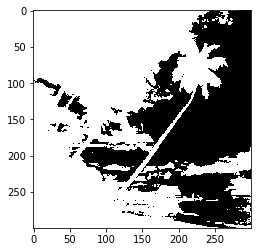

In [22]:
image = cv2.imread('IMAGEN22.png', 0)

_, binarizada = cv2.threshold(image, 210, 255, cv2.THRESH_BINARY)
_, binarizadaInv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)


RGB_im = cv2.cvtColor (binarizadaInv, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )
plt . show ()

#visualizacion mejor
#cv2.imshow('Tipos: Binary - Binary Inv',np.hstack([binarizada,binarizadaInv]))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

**BORDES**

Se usa para encontrar los limites de los objetos dentro de las imagenes

* **Canny**


Primero se transformo la imagen BGR a escalas de grises, despues se aplico detección de bordes con cv2.Canny.

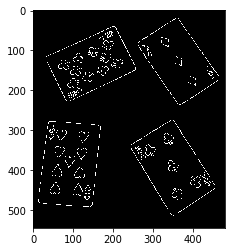

In [37]:
img = cv2.imread("cartas.png")
grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
bordes = cv2.Canny(grises, 100, 200)  

RGB_im = cv2.cvtColor (bordes, cv2.COLOR_BGR2RGB)

plt . imshow (RGB_im )

plt . show ()

#AMPLIADA EN UNA VENTANA
#cv2.imshow("Canny", RGB_im)
#cv2.waitKey(0)

**ROTAR IMAGEN**

Se necesita una matriz en donde se especifique el ángulo de rotación a la que va a ser sometida la imagen, para ello vamos a usar la función cv2.getRotationMatrix2D y posteriormente cv2.warpAffine.

**cv2.getRotationMatrix2D**

Esta función calcula una matriz afín de rotación 2D, además permite ajustar el centro de rotación, así como la escala de la imagen.

**cv2.warpAffine**

Esta función aplica la transformación afín a una imagen. 

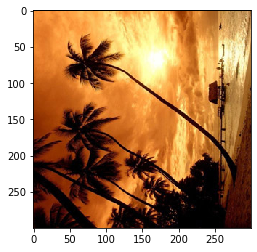

In [49]:
image  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas
# Rotación
M = cv2.getRotationMatrix2D((ancho//2,alto//2),90,1)
imageOut = cv2.warpAffine(image,M,(ancho,alto))
RGB_im = cv2.cvtColor (imageOut, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )

plt . show ()

**INVERTIR HORIZONTAL**

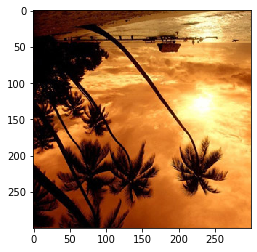

In [11]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )

flip0 = cv2.flip(img,0)
RGB_im = cv2.cvtColor (flip0, cv2.COLOR_BGR2RGB)


plt.imshow(RGB_im,vmin=0,vmax=1)

plt . imshow ( RGB_im )

plt . show ()

**INVERTIR VERTICAL**

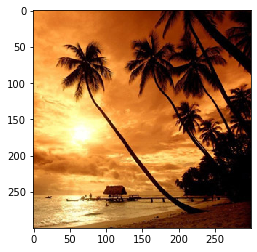

In [18]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )
flip1 = cv2.flip(img,1)
RGB_im = cv2.cvtColor (flip1, cv2.COLOR_BGR2RGB)


plt.imshow(RGB_im,vmin=0,vmax=1)

plt . imshow ( RGB_im )

plt . show ()

**INVERTIR HORIZONTAL Y VERTICAL**

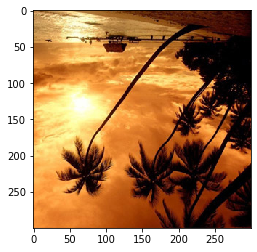

In [19]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )

flip1 = cv2.flip(img,-1)
RGB_im = cv2.cvtColor (flip1, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )

plt . show ()

**IMAGEN BORROSA**

Se uso el método GaussianBlur() de OpenCV, la altura y el ancho del kernel deben ser un número positivo e impar, 

Luego hay que especificar la dirección X e Y. 

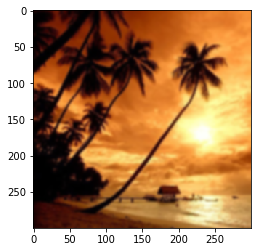

In [51]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )

flip0 = cv2.GaussianBlur(img, (7,7), 0)
RGB_im = cv2.cvtColor (flip0, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )

plt . show ()


**CAMBIAR EL TAMAÑO A UNA IMAGEN**

Se uso el método resize() de openCV. se especifican los valores de los ejes x y y, o el número de filas y columnas que indica el tamaño de la imagen.

- Dimensiones de la imagen:
(660, 1050, 3)
- Tamaño de la imagen  en pixeles:
2079000


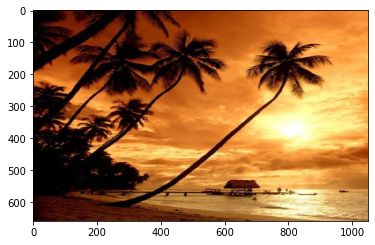

In [26]:
img  =  cv2.imread( "IMAGEN2.png" )

newImg = cv2.resize(img, (0,0), fx=3.5, fy=2.2)
RGB_im = cv2.cvtColor (newImg, cv2.COLOR_BGR2RGB)

print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)

plt . imshow ( RGB_im )

plt . show ()

**RECORTAR IMAGEN**

Para recortar una imagen vamos a tratar a esta como una matriz, para ello emplearemos indexación de Numpy, de donde escogeremos las filas y columnas que deseemos recortar de la imagen.

Planteríamos algo como lo siguiente: imagen(fila inicial : fila final, columna inicial : columna final)


- Dimensiones de la imagen:
(150, 150, 3)
- Tamaño de la imagen  en pixeles:
67500


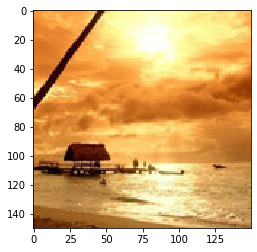

In [153]:
img  =  cv2.imread( "IMAGEN2.png" )
imageOut = img[150:300,150:300]
RGB_im = cv2.cvtColor (imageOut, cv2.COLOR_BGR2RGB)

print("- Dimensiones de la imagen:")
print(RGB_im.shape)
print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)

plt . imshow ( RGB_im )

plt . show ()

**RUIDO EN UNA IMAGEN**

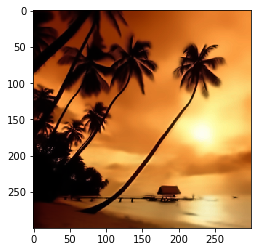

In [25]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/IMAGEN2.png" )
result = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)
RGB_im = cv2.cvtColor (result, cv2.COLOR_BGR2RGB)

plt . imshow ( RGB_im )

plt . show ()

**MORFOLOGIA**

Imagen de entrada:

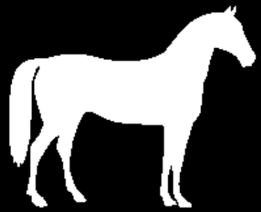

* **Erosion**

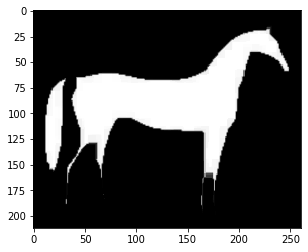

In [52]:
img = cv2.imread('AA.png',0)
kernel = np.ones((15,7),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

RGB_im = cv2.cvtColor (erosion, cv2.COLOR_BGR2RGB)




plt . imshow ( RGB_im )

plt . show ()

* **Dilatacion**

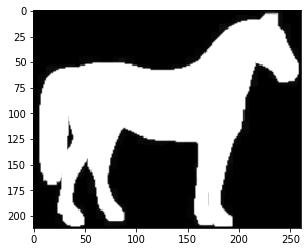

In [29]:
img = cv2.imread('AA.png',0)
kernel = np.ones((7,7),np.uint8)
erosion = cv2.dilate(img,kernel,iterations = 1)

RGB_im = cv2.cvtColor (erosion, cv2.COLOR_BGR2RGB)




plt . imshow ( RGB_im )

plt . show ()

**IDENTIFICAR COLOR VERDE**

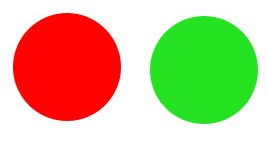

                                                       Imagen de entrada

- Dimensiones de la imagen:
(150, 266, 3)
- Tamaño de la imagen  en pixeles:
119700


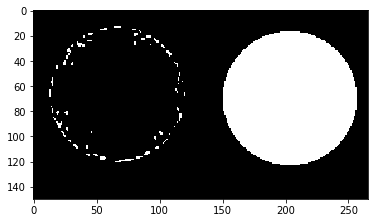

In [34]:
img  =  cv2.imread( "C:/Users/elkin/Pictures/ggg/programa/imagenes/ll.png" )
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_green = np.array([34, 177, 76])

upper_green = np.array([255, 255, 255])

masking = cv2.inRange(hsv_img, lower_green, upper_green)
RGB_im = cv2.cvtColor (masking, cv2.COLOR_BGR2RGB)

print("- Dimensiones de la imagen:")
print(RGB_im.shape)
print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)


plt . imshow ( RGB_im )

plt . show ()

**DETECCION FACIAL**

La detección de rostros es una técnica que permite encontrar en una imagen, el rostro o cara de una o varias personas, mientras que ignora el fondo de la imagen u otros objetos que estén presentes dentro de ella. 

**Haar Cascades Python – OpenCV**

OpenCV nos ofrece clasificadores pre entrenados no solo de rostros de personas, sino de ojos, sonrisa, caras de gatitos, entre otros. Puedes encontrar estos archivos XML en la carpeta: opencv/data/haarcascades/, o puedes encontrarlos en el repositorio de OpenCV en github en el siguiente  [Link](https://github.com/opencv/opencv/tree/master/data/haarcascades).

- Dimensiones de la imagen:
(800, 480, 3)
- Tamaño de la imagen  en pixeles:
1152000


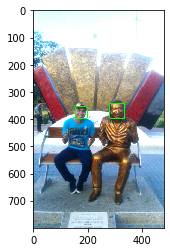

In [53]:
faceClassif = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
image = cv2.imread("er.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceClassif.detectMultiScale(gray,
  scaleFactor=1.1,
  minNeighbors=5,
  minSize=(30,30),
  maxSize=(1100,1100))
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

RGB_im = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)
print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)
plt . imshow ( RGB_im )

plt . show ()

#cv2.imshow("dimagen", RGB_im)
#cv2.waitKey(0)


**CONTANDO OBJETOS**

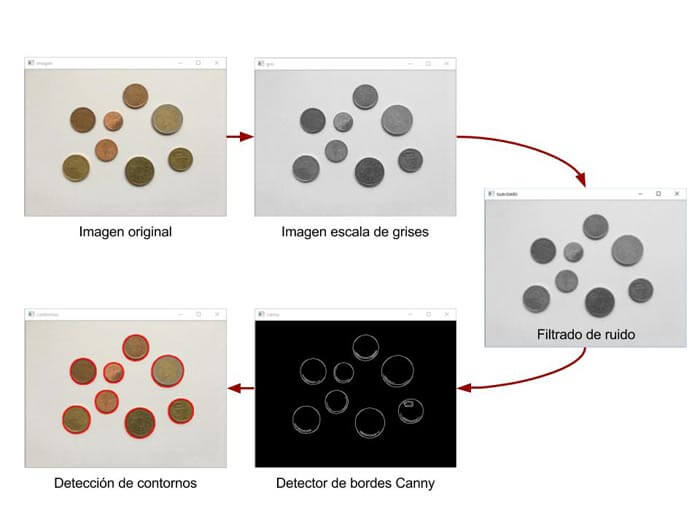

Número de contornos encontrados:  11
- Dimensiones de la imagen:
(480, 640, 3)
- Tamaño de la imagen  en pixeles:
921600


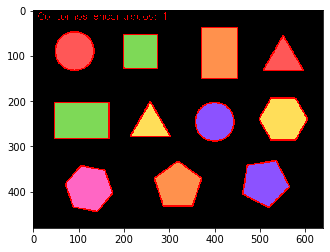

In [54]:
imagen = cv2.imread("figurasColores2.png")
grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  #Transformar una imagen de BGR a escala de grises
bordes = cv2.Canny(grises, 100, 200)  #Aplicar detección de bordes con cv2.Canny


ctns, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imagen, ctns, -1, (0,0,255), 2)
print('Número de contornos encontrados: ', len(ctns))
texto = 'Contornos encontrados: '+ str(len(ctns))
cv2.putText(imagen, texto, (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
  (0, 0, 255), 1)


RGB_im = cv2.cvtColor (imagen, cv2.COLOR_BGR2RGB)
print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)
plt . imshow ( RGB_im )

plt . show ()



**IDENTIFICAR COLOR Y FORMAS GEOMETRICAS**



In [65]:
def figColor(imagenHSV):
  # Rojo
  rojoBajo1 = np.array([0, 100, 20], np.uint8)
  rojoAlto1 = np.array([10, 255, 255], np.uint8)
  rojoBajo2 = np.array([175, 100, 20], np.uint8)
  rojoAlto2 = np.array([180, 255, 255], np.uint8)
  # Naranja
  naranjaBajo = np.array([11, 100, 20], np.uint8)
  naranjaAlto = np.array([19, 255, 255], np.uint8)
  #Amarillo
  amarilloBajo = np.array([20, 100, 20], np.uint8)
  amarilloAlto = np.array([32, 255, 255], np.uint8)
  #Verde
  verdeBajo = np.array([36, 100, 20], np.uint8)
  verdeAlto = np.array([70, 255, 255], np.uint8)
  #Violeta
  violetaBajo = np.array([130, 100, 20], np.uint8)
  violetaAlto = np.array([145, 255, 255], np.uint8)
  #Rosa
  rosaBajo = np.array([146, 100, 20], np.uint8)
  rosaAlto = np.array([170, 255, 255], np.uint8)
  # Se buscan los colores en la imagen, segun los límites altos 
  # y bajos dados
  maskRojo1 = cv2.inRange(imagenHSV, rojoBajo1, rojoAlto1)
  maskRojo2 = cv2.inRange(imagenHSV, rojoBajo2, rojoAlto2)
  maskRojo = cv2.add(maskRojo1, maskRojo2)
  maskNaranja = cv2.inRange(imagenHSV, naranjaBajo, naranjaAlto)
  maskAmarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)
  maskVerde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
  maskVioleta = cv2.inRange(imagenHSV, violetaBajo, violetaAlto)
  maskRosa = cv2.inRange(imagenHSV, rosaBajo, rosaAlto)
  
  cntsRojo = cv2.findContours(maskRojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
  cntsNaranja = cv2.findContours(maskNaranja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
  cntsAmarillo = cv2.findContours(maskAmarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  cntsVerde = cv2.findContours(maskVerde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
  cntsVioleta = cv2.findContours(maskVioleta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  cntsRosa = cv2.findContours(maskRosa, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  if len(cntsRojo)>0: color = 'Rojo'
  elif len(cntsNaranja)>0: color = 'Naranja'
  elif len(cntsAmarillo)>0: color = 'Amarillo'
  elif len(cntsVerde)>0: color = 'Verde'
  elif len(cntsVioleta)>0: color = 'Violeta'
  elif len(cntsRosa)>0: color = 'Rosa'
  return color
    
def figName(contorno,width,height):
  epsilon = 0.01*cv2.arcLength(contorno,True)
  approx = cv2.approxPolyDP(contorno,epsilon,True)
  if len(approx) == 3:
    namefig = 'Triangulo'
  if len(approx) == 4:
    aspect_ratio = float(width)/height
    if aspect_ratio == 1:
      namefig = 'Cuadrado'
    else:
      namefig = 'Rectangulo'
  if len(approx) == 5:
    namefig = 'Pentagono'
  if len(approx) == 6:
    namefig = 'Hexagono'
  if len(approx) > 10:
    namefig = 'Circulo'
  return namefig
  
imagen = cv2.imread("C:/Users/elkin/Pictures/ggg/programa/imagenes/figurasColores2.png")
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10,150)
canny = cv2.dilate(canny,None,iterations=1)
canny = cv2.erode(canny,None,iterations=1)
#_,cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #OpenCV 3
cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #OpenCV 4
imageHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
for c in cnts:
  x, y, w, h = cv2.boundingRect(c)
  imAux = np.zeros(imagen.shape[:2], dtype="uint8")
  imAux = cv2.drawContours(imAux, [c], -1, 255, -1)
  maskHSV = cv2.bitwise_and(imageHSV,imageHSV, mask=imAux)
  name = figName(c,w,h)
  color = figColor(maskHSV)
  nameColor = name + ' ' + color
  cv2.putText(imagen,nameColor,(x,y-5),1,0.8,(0,255,0),1)
  RGB_im = cv2.cvtColor (imagen, cv2.COLOR_BGR2RGB)

  #visualizacion optima
  cv2.imshow('imagen',imagen)
  cv2.waitKey(0)
    
  #plt . imshow ( RGB_im)

  #plt . show ()

**ESTRACCION DE TEXTO DE LA IMAGEN**

Para extraer el texto de una imagen, puedes usar  **Tesseract-OCR**. Puedes descargarlo desde este [Link](https://github.com/tesseract-ocr/)

La imagen de la que extraeremos el texto es la siguiente:

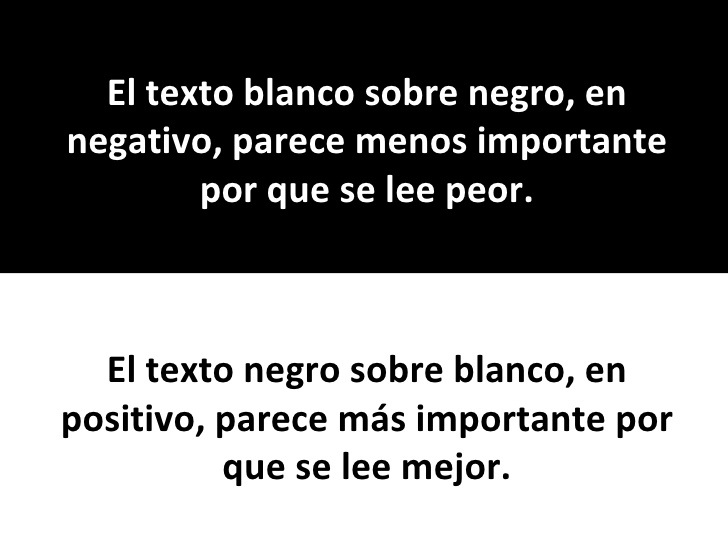

In [57]:
import pytesseract #modulo
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'
print(pytesseract.image_to_string('s.jpg'))

El texto blanco sobre
negro, en negativo,
parecen menos
importantes por que se
leen peor.


In [23]:
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from collections import Counter
from tkinter import messagebox
from tkinter import filedialog
from tkinter import PhotoImage
from tkinter import DoubleVar
from skimage import feature
from tkinter import Canvas
from tkinter import IntVar
from tkinter import Label
from tkinter import Entry
from tkinter import Menu
from tkinter import Tk
from tkinter import NW
from PIL import Image
import numpy as np
import scipy.misc
import statistics
import numpy
import scipy

def abrir():
    ventana.filename = filedialog.askopenfilename(initialdir = "C:/Users/elkin/Pictures/ggg/programa/imagenes",title = "Elige Tu Archivo De Imagen:", filetypes = (("Imagenes PNG", "*.png"),("Imagenes GIF ", "*.gif")))    
    global ruta    
    ruta = ventana.filename
    imagenL = PhotoImage(file = ruta)
    global abrirImagen
    abrirImagen = canvas.create_image(110, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def grises():
    im = Image.open(ruta)
    im2 = im
    k = 0
    i = 0
    while i < im2.size[0]:
        j = 0
        while j < im2.size[1]:
            r, g, b = im2.getpixel((i, j, k))
            g = (r + g + b) / 3
            gris = int(g)
            pixel = tuple([gris, gris, gris])
            im2.putpixel((i, j, k), pixel)
            j+=1
        i+=1
    k+=1
    g = im2.convert('L')
    g.save('C:/Users/elkin/Pictures/ggg/programa/grises.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/grises.gif')
    global grisesito
    grisesito = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def binarizar():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    alpha = entrada.get()
    if alpha==0:
        messagebox.showwarning("ADVERTENCIA:", ("Ingrese Un Valor Valido Mayor A 0"))
    else:
        ima = im
        ren, col = ima.size
        imActual = ima
        pixeles = imActual.load()
        imBinaria = Image.new('RGB', (ren, col))
        binPix = imBinaria.load()
        for x in range(ren):
            for y in range(col):
                if pixeles[x,y] >= alpha:
                    binPix[x,y] = (255,255,255)
                else:
                    binPix[x,y] = (0,0,0)
        imBinaria.save('C:/Users/elkin/Pictures/ggg/programa/binarizar.gif') 
        imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/binarizar.gif')
        global binaria
        binaria = canvas.create_image(600, 160, anchor=NW, image=imagenL)
        ventana.mainloop()
############################################################################################
def rbg():
    im=Image.open(ruta)
    [ren,col]=im.size
    out=im
    i=0
    while i<ren:
        j=0
        while j<col:
            niveles=im.getpixel((i,j))
            nivel_r=niveles[0]
            nivel_g=niveles[1]
            nivel_b=niveles[2]
            out.putpixel((i,j),(nivel_r,nivel_b,nivel_g))
            j+=1
        i+=1
    out.save('C:/Users/elkin/Pictures/ggg/programa/rbg.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/rbg.gif')
    global rbg
    rbg = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()

############################################################################################
def grb():
    im=Image.open(ruta)
    [ren,col]=im.size
    out=im
    i=0
    while i<ren:
        j=0
        while j<col:
            niveles=im.getpixel((i,j))
            nivel_r=niveles[0]
            nivel_g=niveles[1]
            nivel_b=niveles[2]
            out.putpixel((i,j),(nivel_g,nivel_r,nivel_b))
            j+=1
        i+=1
    out.save('C:/Users/elkin/Pictures/ggg/programa/resultados/grb.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/grb.gif')
    global grb
    grb = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def brg():
    im=Image.open(ruta)
    [ren,col]=im.size
    out=im
    i=0
    while i<ren:
        j=0
        while j<col:
            niveles=im.getpixel((i,j))
            nivel_r=niveles[0]
            nivel_g=niveles[1]
            nivel_b=niveles[2]
            out.putpixel((i,j),(nivel_b,nivel_r,nivel_g))
            j+=1
        i+=1
    out.save('C:/Users/elkin/Pictures/ggg/programa/brg.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/brg.gif')
    global brg
    brg = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def bgr():
    im=Image.open(ruta)
    [ren,col]=im.size
    out=im
    i=0
    while i<ren:
        j=0
        while j<col:
            niveles=im.getpixel((i,j))
            nivel_r=niveles[0]
            nivel_g=niveles[1]
            nivel_b=niveles[2]
            out.putpixel((i,j),(nivel_b,nivel_g,nivel_r))
            j+=1
        i+=1
    out.save('C:/Users/elkin/Pictures/ggg/programa/bgr.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/bgr.gif')
    global bgr
    bgr = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def transpuesta():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    im7 = im
    ar = np.zeros((im7.size[0], im7.size[1]))
    i = 0 
    while i < im7.size[1]:
        j = 0
        while j < im7.size[0]:
            a = im7.getpixel((j, i))
            ar[j, i] = a
            j+=1
        i+=1
    ar = ar.astype(int)    
    im7 = Image.fromarray(ar)
    im7.save('C:/Users/elkin/Pictures/ggg/programa/transpuesta.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/transpuesta.gif')
    global trans   
    trans = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def histograma():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    im16 = im
    [ren, col] = im16.size
    total = ren * col
    a = np.asarray(im16, dtype = np.float32)
    a = a.reshape(1, total)
    a = a.astype(int)
    a = max(a)
    valor = 0
    maxd = max(a)
    grises = maxd
    vec=np.zeros(grises + 1)
    for i in range(total - 1):
        valor = a[i]
        vec[valor] = vec[valor] + 1
    plt.plot(vec)
    plt.savefig('C:/Users/elkin/Pictures/ggg/programa/histograma.png', dpi=80)
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/histograma.png')
    global hist
    hist = canvas.create_image(520, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def brillo():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    im9 = im
    arreglo = np.array(im9.size)  
    total = arreglo[0] * arreglo[1]
    i = 0
    suma = 0
    while i < im9.size[0]:
        j = 0
        while j < im9.size[1]:
            suma = suma + im9.getpixel((i, j))
            j+=1
        i+=1
    brillo = suma / total 
    brillo = int(brillo)
    brillo = messagebox.showinfo("BRILLO:", ("El Brillo De La Imagen Es:", brillo))
    ventana.mainloop()
############################################################################################
def contraste():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    im10 = im
    arreglo = np.array(im10.size)  
    total = arreglo[0] * arreglo[1]
    i = 0
    suma = 0
    while i < im10.size[0]:
        j = 0
        while j < im10.size[1]:
            suma = suma + im10.getpixel((i, j))
            j+=1
        i+=1
    brillo = suma / total
    i = 0 
    while i < im10.size[0]:
        j = 0
        while j < im10.size[1]:
            aux = im10.getpixel((i,j)) - brillo 
            suma = suma + aux
            j+=1
        i+=1
    cont = suma * suma
    cont = np.sqrt(suma / total)
    contraste = int(cont)
    contraste = messagebox.showinfo("CONTRASTE:", ("El Contraste De La Imagen Es: ", contraste))
    ventana.mainloop()
############################################################################################
def bordes_sobel():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    ima = im
    [ren, col] = ima.size
    pix = ima.load()
    out_im = Image.new("L", (ren, col))
    mask = ([1,3,3],[-3,-2,3],[-3,-3,1])   
    out = out_im.load()
    for i in range(ren):
        for j in range(col):
            suma = 0
            for n in range(i-1, i+2):
                for m in range(j-1, j+2):
                    if n >= 0 and m >= 0 and n < ren and m < col:
                        suma += mask[n - (i - 1)][ m - (j - 1)] * pix[n, m]
            out[i, j] = suma
    out_im.save('C:/Users/elkin/Pictures/ggg/programa/bordesSobel.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/bordesSobel.gif')
    global bordesSobel    
    bordesSobel = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def bordes_canny():  
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    ima = im
    ima = ndi.gaussian_filter(im, 1)
    edges = feature.canny(ima)
    fig, (ax2) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6), sharex = True, sharey = True)
    ax2.imshow(edges, cmap = plt.cm.gray)
    ax2.axis('off')
    plt.savefig('C:/Users/elkin/Pictures/ggg/programa/bordesCanny.png')
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/bordesCanny.png')
    global bordesCanny    
    bordesCanny = canvas.create_image(450, 100, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def otsu():
    nombre = 'grises.gif'
    im = Image.open("C:/Users/elkin/Pictures/ggg/programa/" + nombre)
    ima = im
    width, height = ima.size
    img = np.array(ima.getdata())
    histogram = np.array(ima.histogram(),float) / (width * height)
    #Vector de probabilidad acomulada.
    omega = np.zeros(256)
    #Vector de media acomulada
    mean = np.zeros(256)
    #Partiendo del histograma normalizado se calculan la probabilidad
    #acomulada (omega) y la media acomulada (mean)
    omega[0] = histogram[0]
    for i in range(len(histogram)):
        omega[i] = omega[i - 1] + histogram[i]
        mean[i] = mean[i - 1] + (i - 1) * histogram[i]
    sigmaB2 = 0
    mt = mean[len(histogram) - 1] #El Valor de la intensidad media de la imagen
    sigmaB2max = 0
    T = 0
    for i in range(len(histogram)):
        clase1 = omega[i]
        clase2 = 1 - clase1
        if clase1 != 0 and clase2 != 0:
            m1 = mean[i] / clase1
            m2 = (mt - mean[i]) / clase2
            sigmaB2 = (clase1 * (m1 - mt) * (m1 - mt) + clase2 * (m2 - mt) * (m2 - mt))
            if sigmaB2 > sigmaB2max:
                sigmaB2max = sigmaB2
                T = i
    thr = int(T)
    messagebox.showinfo("UMBRAL OPTIMO:", ("El Umbral Optimo De La Imagen Es: ", thr))
    #Se Aplica la umbralización al "array" de la imagen
    #limites de procesado en x
    x_min, x_max = 0, width
    #limites de procesado en y
    y_min, y_max = 0, height
    #imagen de salida
    img_out = np.zeros(width * height)
    #procesado de la imagen
    loc = 0 #posicin del "pixel" actual
    for y in range (y_min, y_max):
        for x in range(x_min, x_max):
            loc = y * width + x
            if img[loc] > thr:
                img_out[loc] = 255
            else:
                img_out[loc] = 0
    img_thr = img_out
    im_otsu = img_thr.reshape(height, width)
    im_otsu = Image.fromarray(im_otsu)
    im_otsu.save('C:/Users/elkin/Pictures/ggg/programa/otsu.gif') 
    imagenL = PhotoImage(file = 'C:/Users/elkin/Pictures/ggg/programa/otsu.gif')
    global Otsu    
    Otsu = canvas.create_image(600, 160, anchor=NW, image=imagenL)
    ventana.mainloop()
############################################################################################
def limpiar():
    canvas.delete("all")
############################################################################################
"""Creacion De Ventana Y Lienzo (Canvas)"""
ventana = Tk()
w = 1000
h = 650
extraW=ventana.winfo_screenwidth() - w
extraH=ventana.winfo_screenheight() - h
ventana.geometry("%dx%d%+d%+d" % (w, h, extraW / 2, extraH / 2))
canvas = Canvas(ventana, width=1000, height=650)
canvas.pack()
ventana.title("PROCESAMIENTO DE IMAGENES EN PYTHON - ELKIN RAMIREZ")
entrada = IntVar()
entrada2 = DoubleVar()
Entry(ventana, textvariable = entrada, width = 8).place(x=20, y=65)
Label(text = "Ingrese Los Pixeles ", font= ("Times New Roman",9)).place(x=0, y=20)
Label(text = "En Enteros ", font= ("Times New Roman",9)).place(x=17, y=40)
Label(text = "IMAGEN ORIGINAL", font= ("Times New Roman",14)).place(x=175, y=120)
Label(text = "IMAGEN PROCESADA", font= ("Times New Roman",14)).place(x=650, y=120)
############################################################################################
"""Creacion De Los Menus"""
barraMenu = Menu(ventana)
mnuOpciones = Menu(barraMenu)
mnuUnidad1 = Menu(barraMenu)
mnuUnidad2 = Menu(barraMenu)
mnuUnidad3 = Menu(barraMenu)
mnuUnidad4 = Menu(barraMenu)
mnuUnidad5 = Menu(barraMenu)
############################################################################################
"""Menu Unidad I"""
mnuUnidad1.add_command(label = "ABRIR IMAGEN", command = abrir)
mnuUnidad1.add_separator()
mnuUnidad1.add_command(label = "RBG", command = rbg)
mnuUnidad1.add_separator()
mnuUnidad1.add_command(label = "BRG", command = brg)
mnuUnidad1.add_separator()
mnuUnidad1.add_command(label = "BGR", command = bgr)
mnuUnidad1.add_separator()
mnuUnidad1.add_command(label = "ESCALA DE GRISES", command = grises)
mnuUnidad1.add_separator()
mnuUnidad1.add_command(label = "BINARIZACION", command = binarizar)
mnuUnidad1.add_separator()
mnuUnidad1.add_command(label = "OTSU", command = otsu)

############################################################################################
"""Menu Unidad II"""
mnuUnidad2.add_command(label = "BRILLO", command = brillo)
mnuUnidad2.add_separator()
mnuUnidad2.add_command(label = "CONTRASTE", command = contraste)
mnuUnidad2.add_separator()
mnuUnidad2.add_command(label = "TRANSPUESTA", command = transpuesta)
mnuUnidad2.add_separator()
mnuUnidad2.add_command(label = "HISTOGRAMA", command = histograma)
mnuUnidad2.add_separator()

############################################################################################
"""Menu Unidad III"""
mnuUnidad3.add_command(label = "BORDES (SOBEL)", command = bordes_sobel)
mnuUnidad3.add_separator()
mnuUnidad3.add_command(label = "BORDES (CANNY)", command = bordes_canny)
############################################################################################
"""Menu Opciones"""
mnuOpciones.add_command(label = "LIMPIAR", command = limpiar)
mnuOpciones.add_separator()
mnuOpciones.add_command(label = "SALIR", command = ventana.destroy)
############################################################################################
barraMenu.add_cascade(label = "UNIDAD I", menu = mnuUnidad1)
barraMenu.add_cascade(label = "UNIDAD II", menu = mnuUnidad2)
barraMenu.add_cascade(label = "UNIDAD III", menu = mnuUnidad3)
barraMenu.add_cascade(label = "OPCIONES", menu = mnuOpciones)
ventana.config(menu = barraMenu)
ventana.mainloop()
############################################################################################  

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\elkin\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-23-c39d00ae4898>", line 40, in grises
    r, g, b = im2.getpixel((i, j, k))
  File "C:\Users\elkin\anaconda3\lib\site-packages\PIL\Image.py", line 1358, in getpixel
    return self.im.getpixel(xy)
TypeError: argument must be sequence of length 2
